In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
general = 'Erdos'
tipo = "scalefree_MDH_Erdos"
subfijo = "_SME"

In [49]:
"""
EME: GRAT > MDH > GAT
EIE: MDH > SAGE > GRAT 

** GAT es muy mala heurística pura y sage muy buena

SIE: MDH > GRAT > SAGE
SME: GRAT > MDH > GAT


EMS: 
SMS: 
SIS:
EIS:
""";

In [50]:
FastCover = pd.read_csv(f"FastCover/results/{tipo}/FCResults{subfijo}.txt", header = None)
#FastCover = pd.read_csv("FastCover/results/paper/FastCoverResults_MDH_erdos.txt", header = None)
FastCover.columns = ["graph", "target_size","t_mean","n"]
FastCover["model"] = "GRAT"
FastCover = FastCover[["graph", "model","target_size", "n", "t_mean"]]
FastCover.head()

,graph,model,target_size,n,t_mean
0,ER_10000_10_0,GRAT,1633,10000,0.071
1,ER_10000_10_1,GRAT,1607,10000,0.070
2,ER_10000_15_0,GRAT,1971,10000,0.090
3,ER_10000_15_1,GRAT,1995,10000,0.081
4,ER_10000_20_0,GRAT,2224,10000,0.122


In [51]:
#models = ['GAT', "GCN", "GraphConv", "SAGE", "SGConv"]
models = ["SAGE"]
Full = pd.DataFrame()

for model in models:
    
    GNN = pd.read_csv(f"Models/results/{tipo}/Pruebas_GA/Allfeatures/{model}Results{subfijo}.txt", header = None)
    #GNN = pd.read_csv(f"Models/results/paper/{model}Results_MDH_erdos.txt", header = None)
    
    GNN.columns = ["graph", "target_size","t_mean","n"]
    GNN["model"] = model
    GNN = GNN[["graph", "model","target_size", "n", "t_mean"]]
    
    Full = pd.concat([Full, GNN])



GNN = pd.read_csv(f"Models/results/{tipo}/ant/GATResults{subfijo}.txt", header = None)
    
GNN.columns = ["graph", "target_size","t_mean","n"]
GNN["model"] = "GAT"
GNN = GNN[["graph", "model","target_size", "n", "t_mean"]]

Full = pd.concat([Full, GNN])
    
print(Full.shape)
Full.head()

(36, 5)


,graph,model,target_size,n,t_mean
0,ER_10000_10_0,SAGE,1573,10000,0.061164
1,ER_10000_10_1,SAGE,1568,10000,0.103333
2,ER_10000_15_0,SAGE,1952,10000,0.105182
3,ER_10000_15_1,SAGE,1932,10000,0.102802
4,ER_10000_20_0,SAGE,2205,10000,0.118439


In [52]:
MDH = pd.read_csv(f"MDH/MDH_{general}_Results.txt", header = None)
MDH.columns = ["graph", "target_size","t_mean","n"]
MDH["model"] = 'MDH'
MDH = MDH[["graph", "model","target_size", "n", "t_mean"]]
MDH = MDH.query("graph != 'com-youtube.ungraph'")
print(MDH.shape)
MDH.head()

(18, 5)


,graph,model,target_size,n,t_mean
0,ER_10000_10_0,MDH,1617,10000,0.065
1,ER_10000_10_1,MDH,1618,10000,0.069
2,ER_10000_15_0,MDH,1980,10000,0.099
3,ER_10000_15_1,MDH,1962,10000,0.091
4,ER_10000_20_0,MDH,2274,10000,0.114


In [53]:
Full = pd.concat([Full, MDH, FastCover])
Full['ratio'] =  Full.target_size/Full.n

In [54]:
#Full = Full.sort_values(by=['n'])
Full = Full.reset_index()
Full = Full.query("graph != 'com-youtube.ungraph'")
Full

,index,graph,model,target_size,n,t_mean,ratio
0,0,ER_10000_10_0,SAGE,1573,10000,0.061164,0.157300
1,1,ER_10000_10_1,SAGE,1568,10000,0.103333,0.156800
2,2,ER_10000_15_0,SAGE,1952,10000,0.105182,0.195200
3,3,ER_10000_15_1,SAGE,1932,10000,0.102802,0.193200
4,4,ER_10000_20_0,SAGE,2205,10000,0.118439,0.220500
...,...,...,...,...,...,...,...
67,13,ER_30000_15_0,GRAT,5952,30000,0.535000,0.198400
68,14,ER_30000_20_0,GRAT,6713,30000,0.696000,0.223767
69,15,ER_50000_10_0,GRAT,14685,50000,5.275000,0.293700
70,16,ER_50000_15_0,GRAT,9897,50000,1.351000,0.197940


In [55]:
Full['target_size_diff'] = ( np.array(Full.target_size) - np.tile(MDH.target_size, 4) )

In [56]:
Full.model.count()

72

In [57]:
fig = px.histogram(Full, x="graph", y="target_size",
             color='model', barmode='group',
             height=400)
fig.show()

In [59]:
fig = px.histogram(Full, x="graph", y="target_size_diff",
             color='model', barmode='group',
             height=400)
fig.show()

In [60]:
Full.groupby(by = "model").mean().sort_values(by=['ratio'])

,index,target_size,n,t_mean,ratio,target_size_diff
model,,,,,,
SAGE,8.5,4795.555556,23333.333333,0.576995,0.197275,71.444444
MDH,8.5,4724.111111,23333.333333,0.578278,0.198539,0.000000
GRAT,8.5,4897.222222,23333.333333,0.673889,0.201512,173.111111
GAT,8.5,4874.944444,23333.333333,0.525501,0.209059,150.833333


In [61]:
print(Full.shape)
Full_ = Full.drop_duplicates(subset=['target_size'], keep = False)
Full_.shape

(72, 8)


(72, 8)

In [62]:
Full_.query(f"graph == '{Full_.graph.unique()[-1]}'").sort_values(by = ['target_size'])

,index,graph,model,target_size,n,t_mean,ratio,target_size_diff
17,17,ER_50000_20_0,SAGE,10883,50000,1.823405,0.21766,-334
71,17,ER_50000_20_0,GRAT,11146,50000,1.634000,0.22292,-71
53,17,ER_50000_20_0,MDH,11217,50000,2.005000,0.22434,0
35,17,ER_50000_20_0,GAT,11327,50000,1.916532,0.22654,110


## Por mejor solución

In [63]:
models_name = Full_.model.unique()
Dict = {m: i for m, i in zip(models_name, np.arange(models_name.shape[0]))}

MT = np.zeros((models_name.shape[0], models_name.shape[0]))
for graph in Full_.graph.unique():
    
    Temp = np.array(Full_.query(f"graph == '{graph}'").sort_values(by = "ratio", ascending = False).model)
    
    for m in range(Temp.shape[0]):

        if (m + 1) == Temp.shape[0]:
            MT[ Dict[ Temp[m] ] ][ Dict[ Temp[m] ] ] += 1
            continue
        
        for j in range(m + 1, Temp.shape[0]):
            MT[ Dict[ Temp[m] ] ][ Dict[ Temp[j] ] ] += 1
        

MT_ = MT / np.expand_dims(np.sum(MT, axis = 1), 1)
# La por filas siempre debe de dar 1 y para la probabilidad de estado estacionario, 
# se hace la transpuesta, es decir, las columnas son las deben sumar 1
MT_.sum(1)

array([1., 1., 1., 1.])

In [64]:
SPD_best = np.ones(MT_.shape[0])/MT_.shape[0] # initial distirbution
for _ in range(200):
    SPD_best = np.dot(MT_.T, SPD_best)
print(np.round(SPD_best,5), '\n',models_name)

[0.82626 0.05652 0.07235 0.04487] 
 ['SAGE' 'GAT' 'MDH' 'GRAT']


In [65]:
# Obtenemos el mínimo porque 
models_name[np.argsort(-SPD_best)]

array(['SAGE', 'MDH', 'GAT', 'GRAT'], dtype=object)

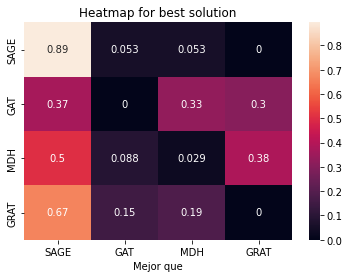

In [66]:
sns.heatmap(MT_, annot = True, xticklabels = models_name, yticklabels = models_name)
plt.title("Heatmap for best solution")
plt.xlabel("Mejor que");

## Por tiempo

In [38]:
MT = np.zeros((models_name.shape[0], models_name.shape[0]))
for graph in Full_.graph.unique():
    Temp = np.array(Full_.query(f"graph == '{graph}'").sort_values(by = "t_mean", ascending=False).model)
    for m in range(Temp.shape[0]):

        if (m + 1) == Temp.shape[0]:
            MT[ Dict[ Temp[m] ] ][ Dict[ Temp[m] ] ] += 1
            continue
        MT[ Dict[ Temp[m] ] ][ Dict[ Temp[m + 1] ] ] += 1

MT_ = MT / np.expand_dims(np.sum(MT, axis = 1), 1)
# La por filas siempre debe de dar 1 y para la probabilidad de estado estacionario, 
# se hace la transpuesta, es decir, las columnas son las deben sumar 1
MT_.sum(1)

array([1., 1., 1., 1.])

In [39]:
SPD_time = np.ones(MT_.shape[0])/MT_.shape[0] # initial distirbution
for _ in range(100):
    SPD_time = np.dot(MT_.T, SPD_time)
print(np.round(SPD_time,5), '\n',models_name)

[0.6211  0.14946 0.05952 0.16992] 
 ['SAGE' 'GAT' 'MDH' 'GRAT']


In [40]:
models_name[np.argsort(-SPD_time)]

array(['SAGE', 'GRAT', 'GAT', 'MDH'], dtype=object)

Text(0.5, 1.0, 'Heatmap for fastest solution')

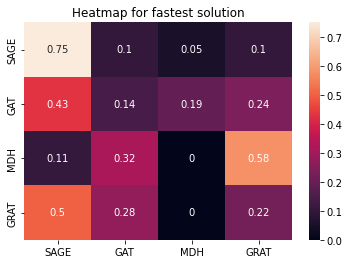

In [41]:
sns.heatmap(MT_, annot = True, xticklabels = models_name, yticklabels = models_name)
plt.title("Heatmap for fastest solution")

## All together

In [42]:
print("---- Best solution ----\n")
c = 1
for g in np.argsort(-SPD_best):
    print(c," - ", models_name[g][:6], f" \t {SPD_best[g]:.3f}")
    c += 1

---- Best solution ----

1  -  SAGE  	 0.420
2  -  GAT  	 0.272
3  -  MDH  	 0.251
4  -  GRAT  	 0.057


In [25]:
print("------ Best time ------\n")
c = 1
for g in np.argsort(-SPD_time):
    print(c," - ", models_name[g][:6], f" \t {SPD_time[g]:.3f}")
    c+=1

------ Best time ------

1  -  SAGE  	 0.234
2  -  GraphC  	 0.195
3  -  GAT  	 0.185
4  -  GRAT  	 0.150
5  -  GCN  	 0.119
6  -  SGConv  	 0.088
7  -  MDH  	 0.028
